# Comparison of ML Classification algorithm 
<br>

**Machine Learning HW3 P3**<br>
**Spring 2024**<br>
**Abhina Premachandran Bindu**<br>
**Date: 02/22/2024** <br>


## Importing necessary libraries and functions
   From https://scikit-learn.org/stable/datasets/sample_generators.html , it is clear that make_blobs create normally distributed cluster of points, which can be easily classified even by using a linear classifier. But inorder for the linear classifier to work poorly, the functions such as make_moons and make_circles have to be used to generate data. Therefore, the four different cases needed to compare the working of different classifiers can be stated as:<br>
1. Creating two well separated blob classes - in which all classifiers work pretty well. For this make_blobs function from sklearn is used.<br>
2. For creating data that can be well classified using a quadratic classifier, it is ideal to use make_circles which produce data points in the circular shape in 2D, which can be easily classified by a quadratic classifier.<br>
3. The example in which KNN and Decision tree overfits but logistic regression does better is the data created by make_moons, which creates two interleaving half circles.<br>
4. The example in which KNN and SVM does better than other algorithms - the data used must be complex and should include both moons and circles.<br>

In [15]:
# importing the libraries and functions
import numpy as np
import matplotlib.pyplot as plt
# for creating the synthetic data points
from sklearn.datasets import make_blobs, make_circles, make_moons
# for model fitting and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# for visualizing the decision boundaries
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline

# Importing the classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Creating datasets
### 1. Creating two well separated blob classes

In [2]:
X1, y1 = make_blobs(n_samples =500, n_features=2, centers=2)

In [3]:
X1.shape, y1.shape

((500, 2), (500,))

In [4]:
X1[:5,:], y1[:5]

(array([[-5.47118464,  0.11018625],
        [-5.26545633,  2.40256877],
        [-4.95539205, -6.09667784],
        [-7.3813351 ,  1.44898278],
        [-3.86464188, -6.09645418]]),
 array([1, 1, 0, 1, 0]))

### 2. Creating circular classes for which the quadratic model works the best

In [5]:
X2, y2 = make_circles(n_samples =500,noise=0.2, factor=0.5, random_state=1)


In [6]:
X2.shape, y2.shape

((500, 2), (500,))

In [7]:
X2[:5,:], y2[:5]

(array([[ 0.29261252,  0.64941147],
        [ 0.00638367,  0.2361874 ],
        [ 0.46468649,  0.94051199],
        [-0.32877224,  0.76624498],
        [ 0.57275616, -0.47528788]]),
 array([1, 1, 0, 0, 1]))

### 3. For creating data where Decision Tree and KNN overfits

In [8]:
X3, y3 = make_moons(n_samples =500, noise=0.3, random_state=0)

In [9]:
X3.shape, y3.shape

((500, 2), (500,))

In [10]:
X3[:5,:], y3[:5]

(array([[ 0.24277092,  0.89098144],
        [-0.57961074,  0.50618765],
        [ 0.24259841,  0.12209649],
        [ 1.68348295, -0.10059047],
        [ 2.00696736, -0.79306007]]),
 array([0, 1, 1, 1, 1]))

### 4.  The example in which KNN and SVM does better than other algorithms

In [11]:
X4_c, y4_c = make_circles(n_samples =250,noise=0.2, factor=0.5, random_state=1)
X4_m, y4_m = make_moons(n_samples =250,noise=0.2, random_state=1)

X4 = np.vstack([X4_c, X4_m])
y4 = np.hstack([y4_c, y4_m])

X4[240:260,:], y4[240:260]

(array([[ 0.0741935 ,  0.50720135],
        [-0.67767586, -0.21576449],
        [-0.96761353, -0.8407827 ],
        [ 0.5303393 ,  0.18193274],
        [-0.62532083, -0.05717701],
        [ 0.47921049,  0.48524756],
        [-0.73109106, -0.59255341],
        [-0.02452508,  0.15918868],
        [ 0.60951548, -0.55298277],
        [-0.12181053,  0.83604039],
        [-0.13126199,  0.83695485],
        [ 2.25475119,  0.89342035],
        [ 1.51476366,  0.28423616],
        [ 0.71342417, -0.2231734 ],
        [-0.91023845,  0.91468265],
        [ 1.7698442 , -0.21266117],
        [-0.14484331,  1.10497682],
        [ 2.08721437,  0.00434425],
        [ 0.9276955 , -0.7131833 ],
        [ 1.15524153,  0.11048178]]),
 array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]))

## Defining the Machine Learning Algorithm Classifiers and the data points to compare the performance 

In [12]:
NB = GaussianNB()
lr = LogisticRegression(random_state = 23)
QDA = QuadraticDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors = 1)
SVM = SVC(kernel = 'rbf')
dt = DecisionTreeClassifier(random_state = 23)
classifiers = [('GaussianNB',NB),('Logistic Regression', lr),
               ('QuadraticDiscriminantAnalysis', QDA),
               ('SVM',SVM),('Classification Tree', dt),('K Nearest Neighbors',knn)]

data_values = [(X1,y1),(X2,y2),(X3,y3),(X4,y4)]


## Defining the necessary functions

In [13]:
count = 1
for X,y in data_values:
    
    for clf_name, clf in classifiers:
        
        X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33,random_state=42)
        SS = StandardScaler()
        SS.fit(X_train)
        SSX_train = SS.transform(X_train)
        SSX_test = SS.transform(X_test)

        clf.fit(SSX_train,y_train)
        ypred_train = clf.predict(SSX_train)
        ypred_test = clf.predict(SS.transform(X_test))
        print(f" Training results of {clf_name} on (X{count},y{count})")
        print(classification_report(y_train, ypred_train))
        print(f" Testing results of {clf_name} on (X{count},y{count})")
        print(classification_report(y_test, ypred_test))
        
        print("-------------------------------------------------------------------------------------")
    count = count + 1
    print("-------------------------------------------------------------------------------------")

 Training results of GaussianNB on (X1,y1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       175

    accuracy                           1.00       335
   macro avg       1.00      1.00      1.00       335
weighted avg       1.00      1.00      1.00       335

 Testing results of GaussianNB on (X1,y1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        75

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

-------------------------------------------------------------------------------------
 Training results of Logistic Regression on (X1,y1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1  

## Conclusion from the classification report of all classifiers for the four set of data points
1. The first dataset (X1,y1), which includes data points which are well separated blob classes get classified perfectly by all classifiers. It is clear from the 100% accuracy of all classifiers.
2. For the second class of data values(circular), the Logistic Regression have a lowest accuracy of 38% of accuracy. KNN and Tree overfits, Gaussian, SVM, and Quadratic does better with a testing accuracy of 81%.
3. For the third dataset of moons, as expected both the decision Tree and KNN overfits. All other algortihms does better.
4. For the fourth set of data points, SVM, KNN, and Tree does better with testing accuracies greater than 85%.

# Visualization of comparisons

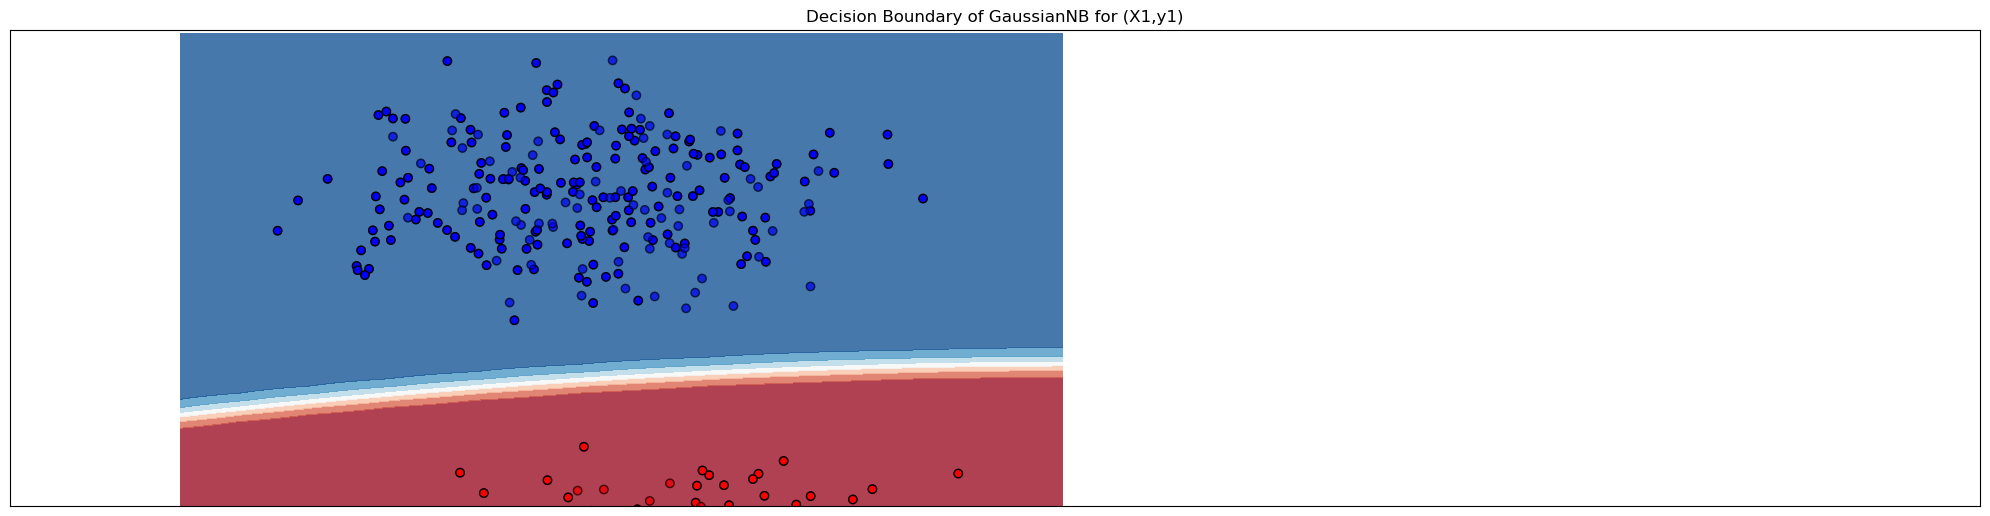

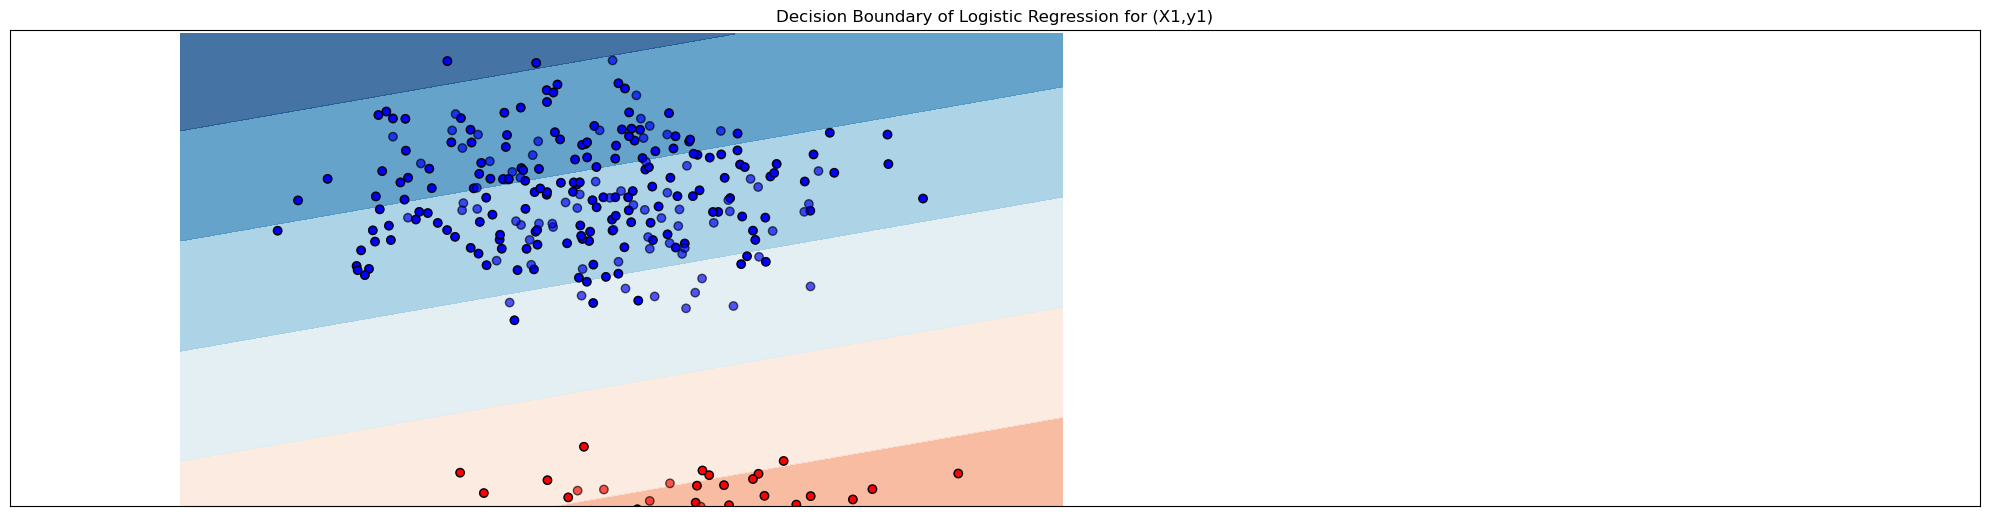

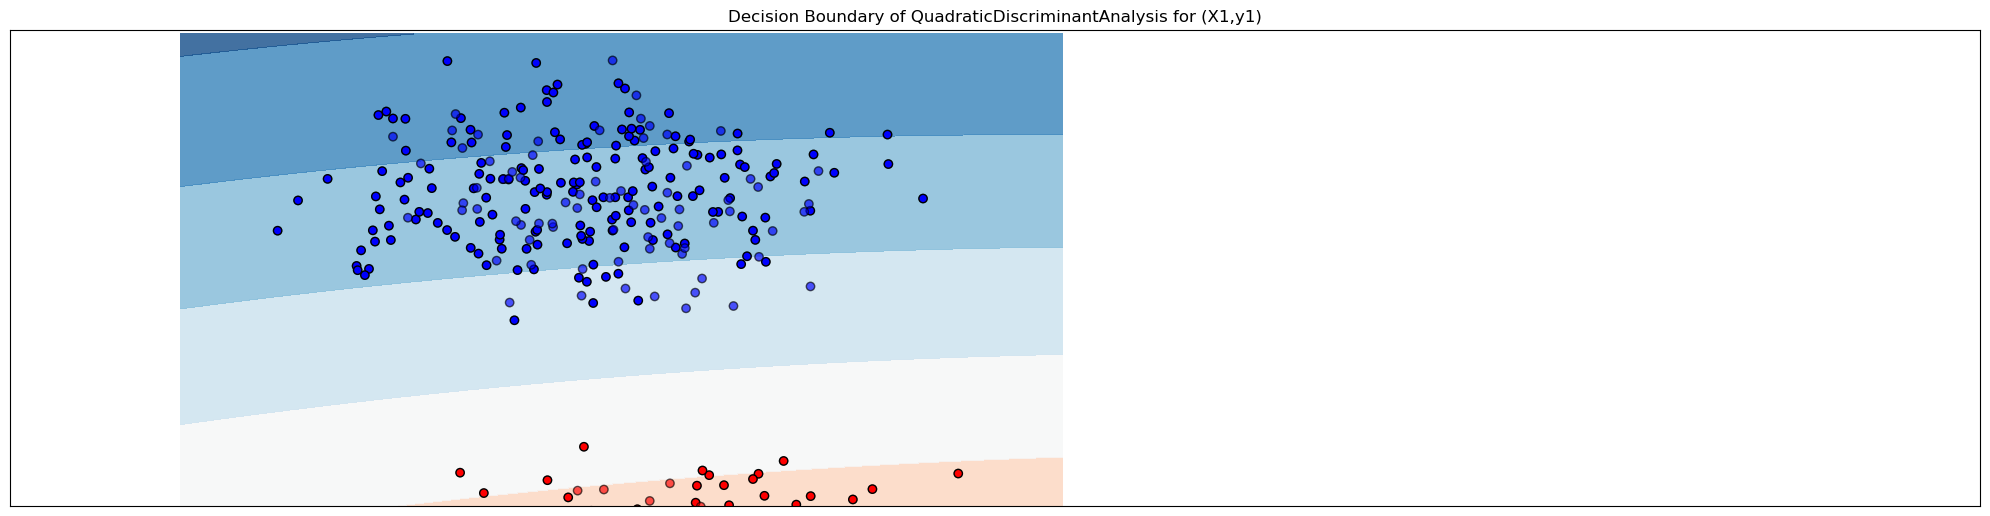

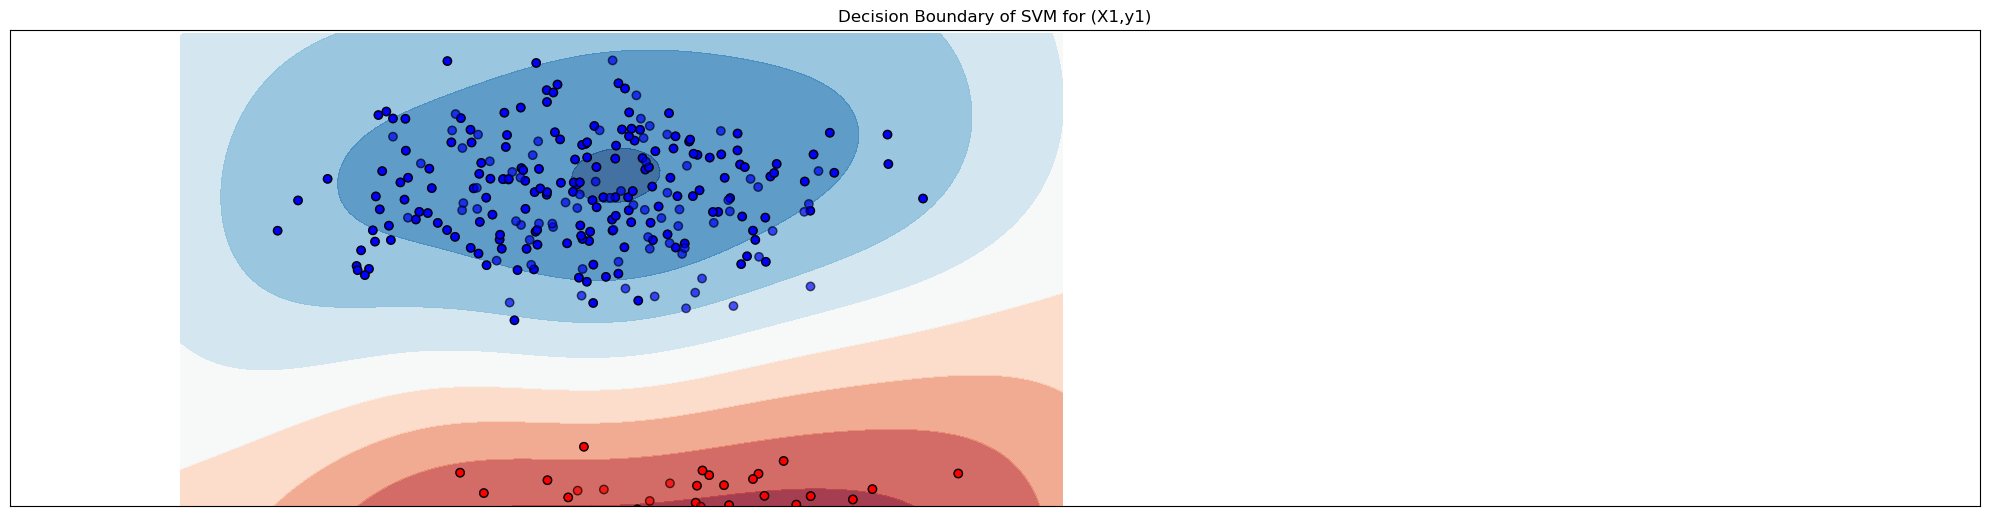

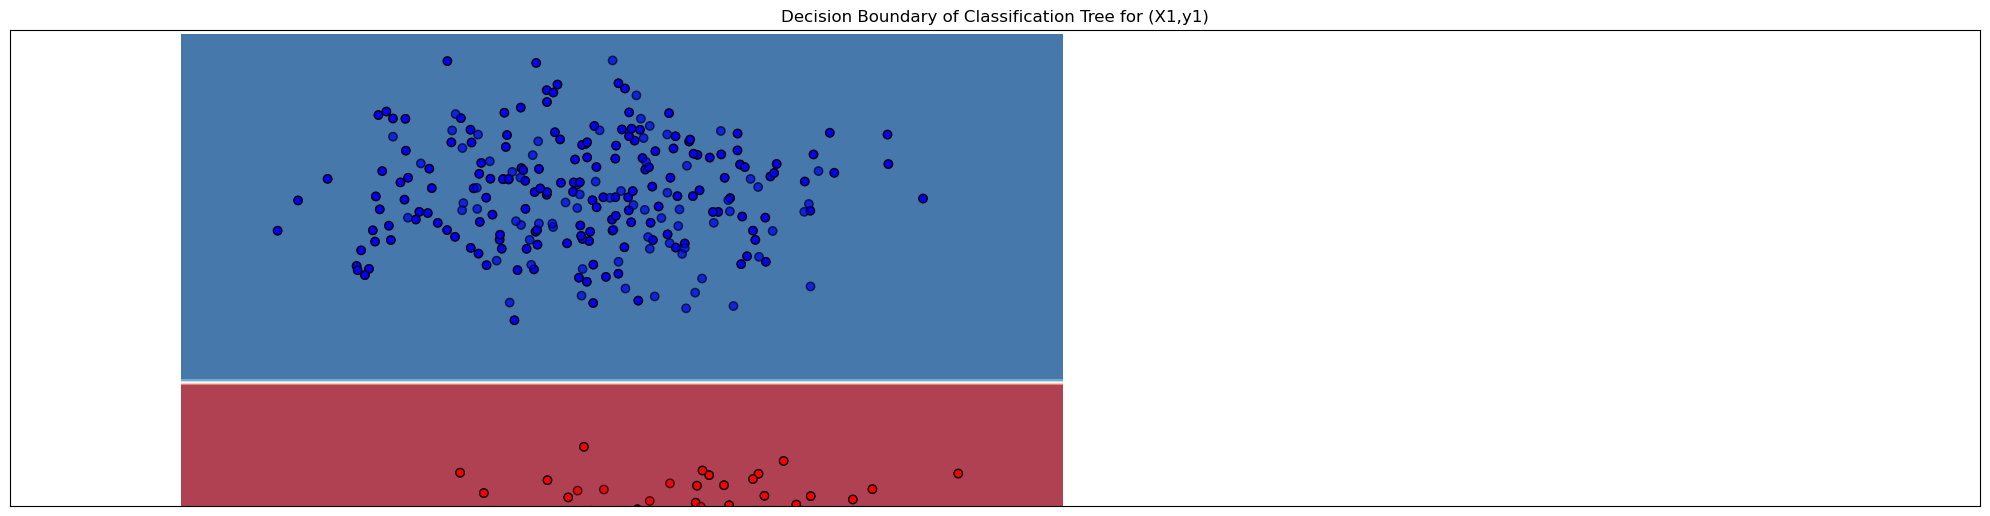

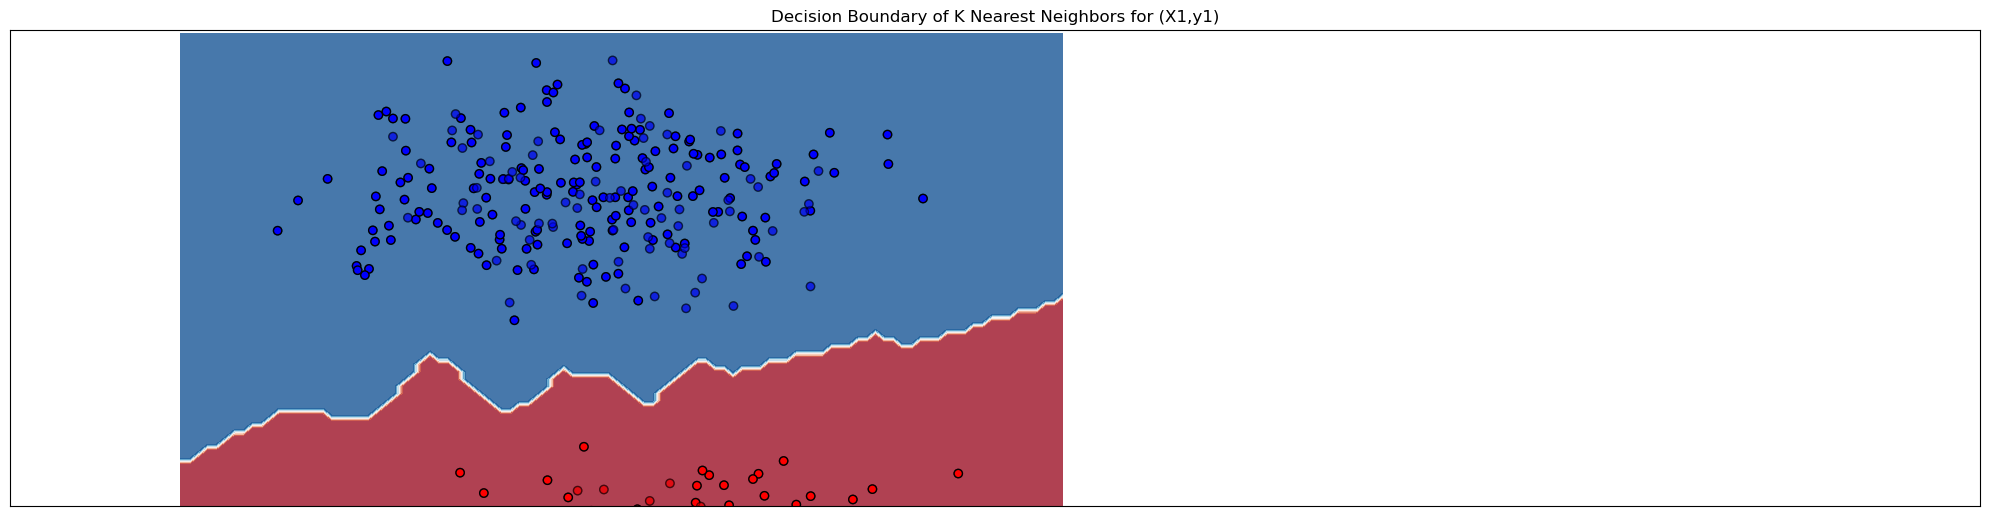

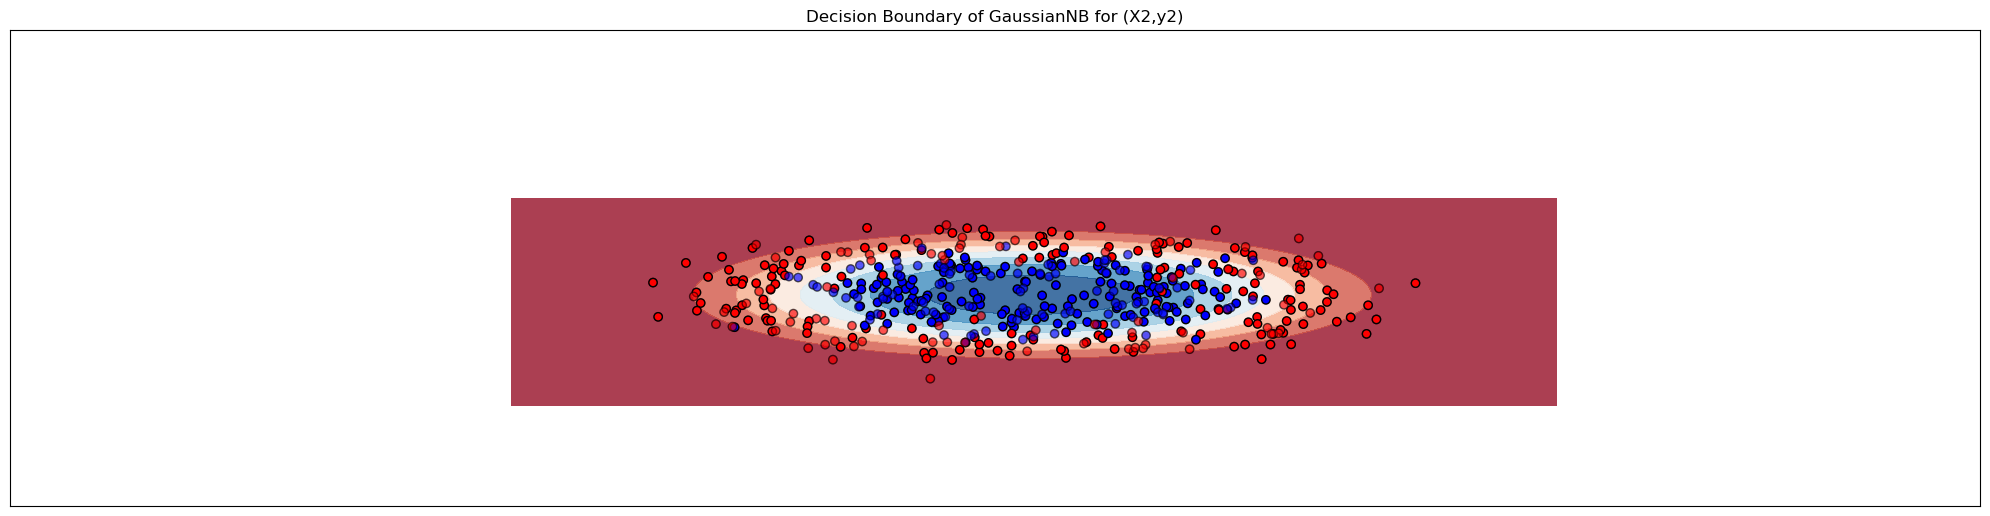

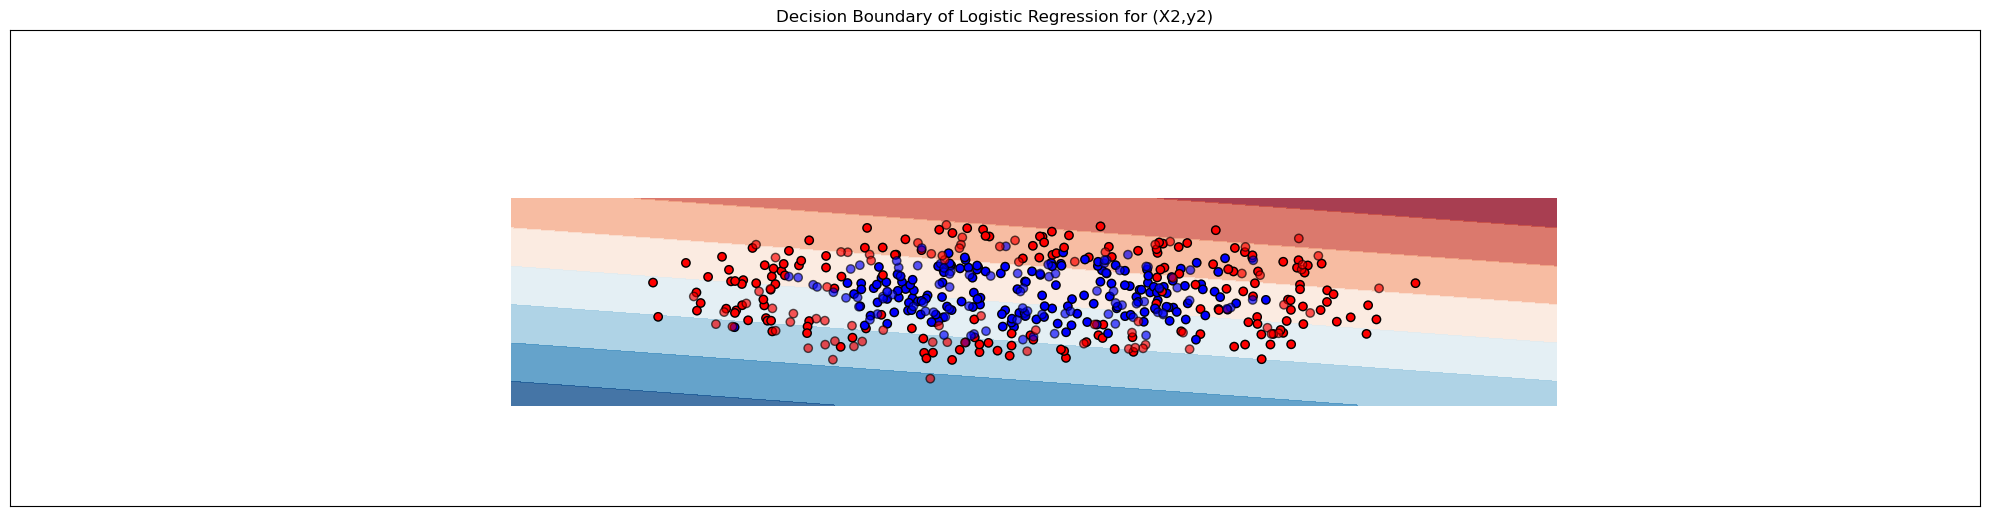

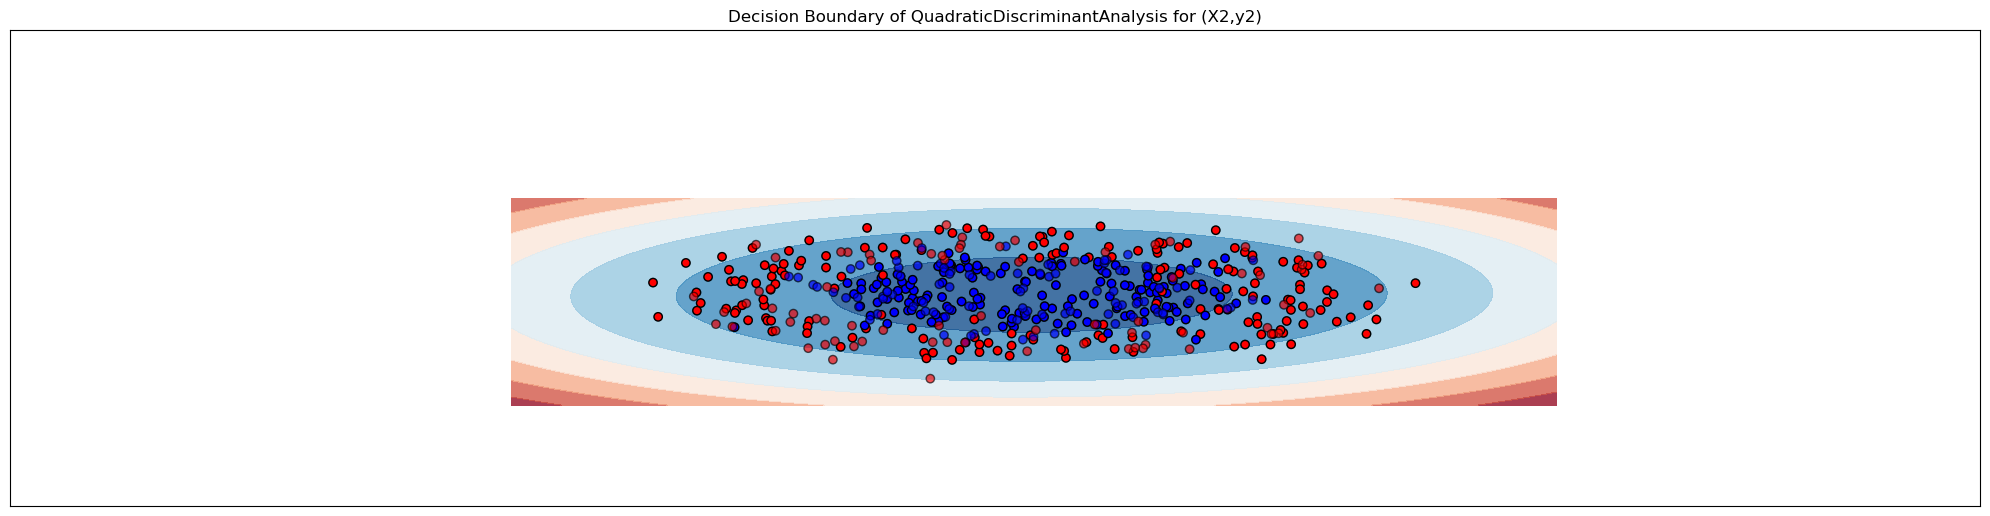

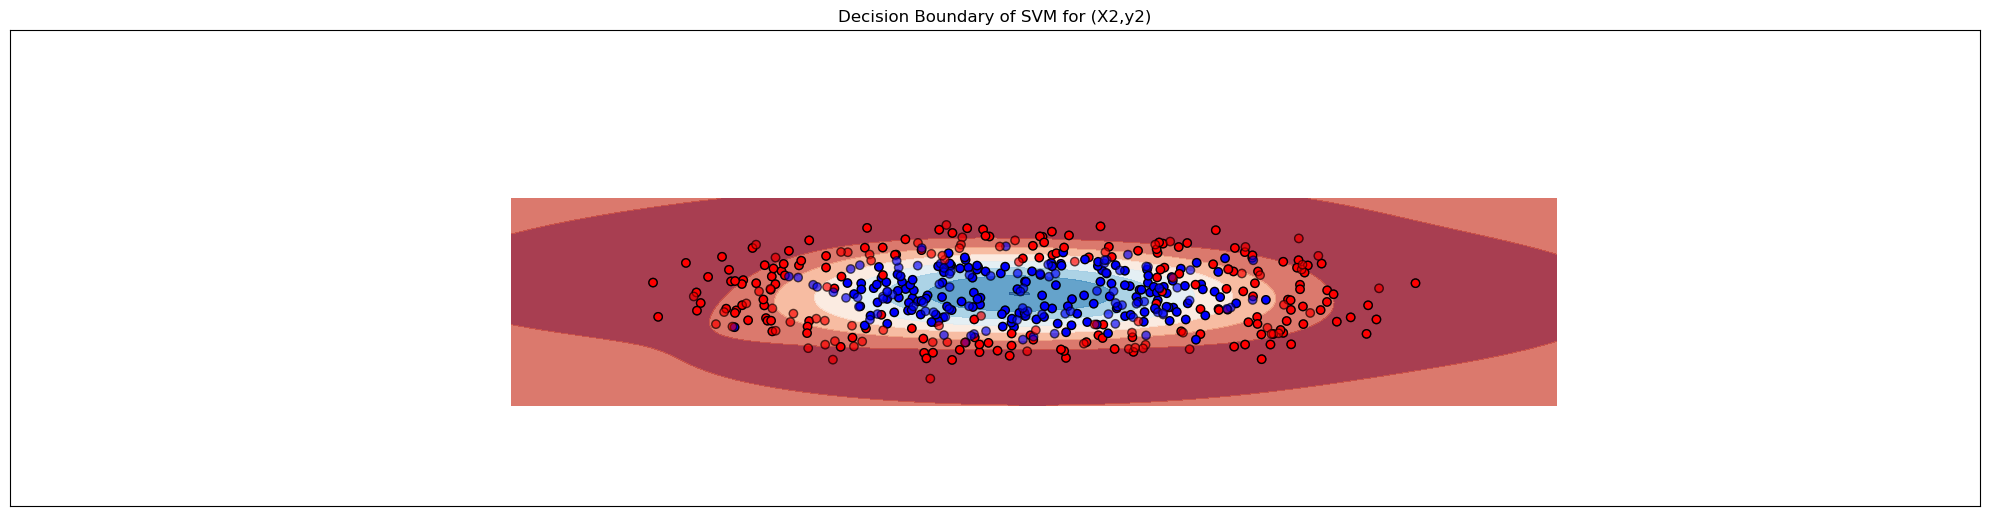

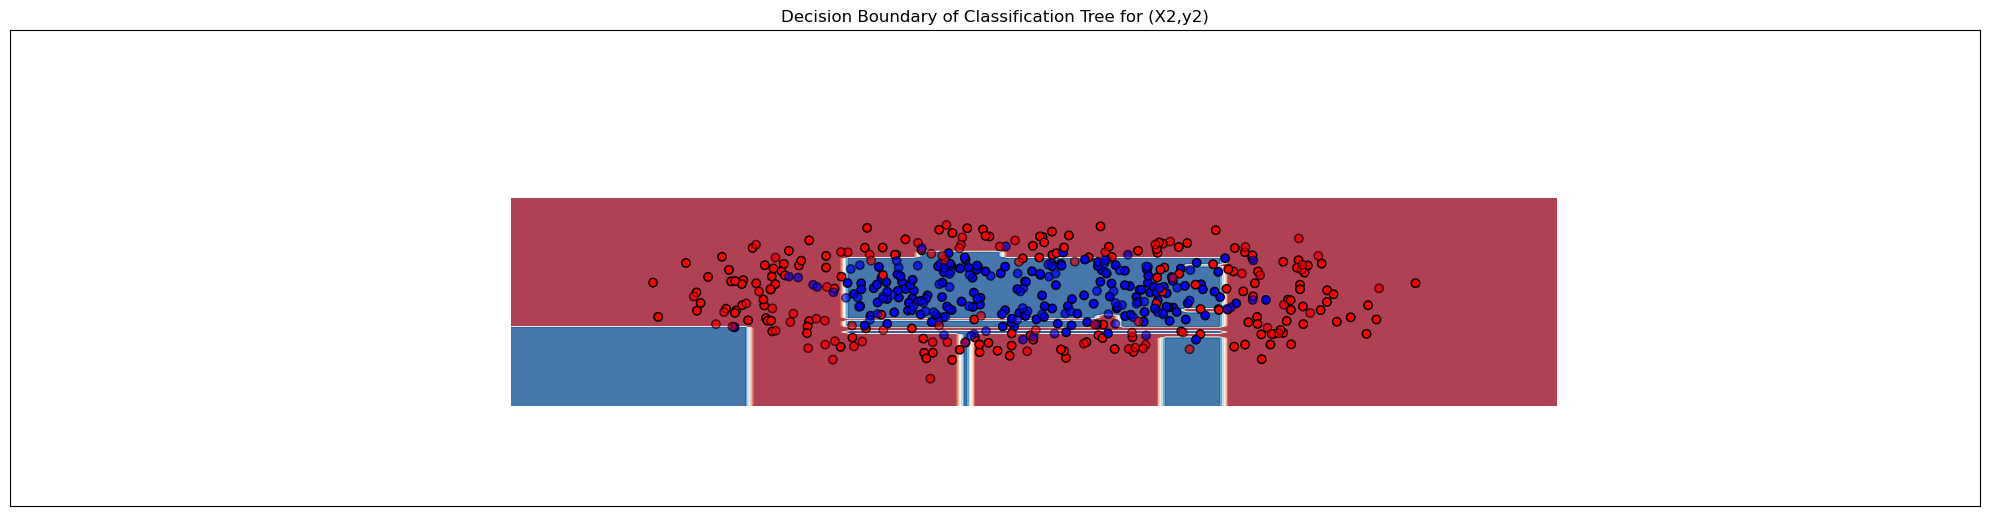

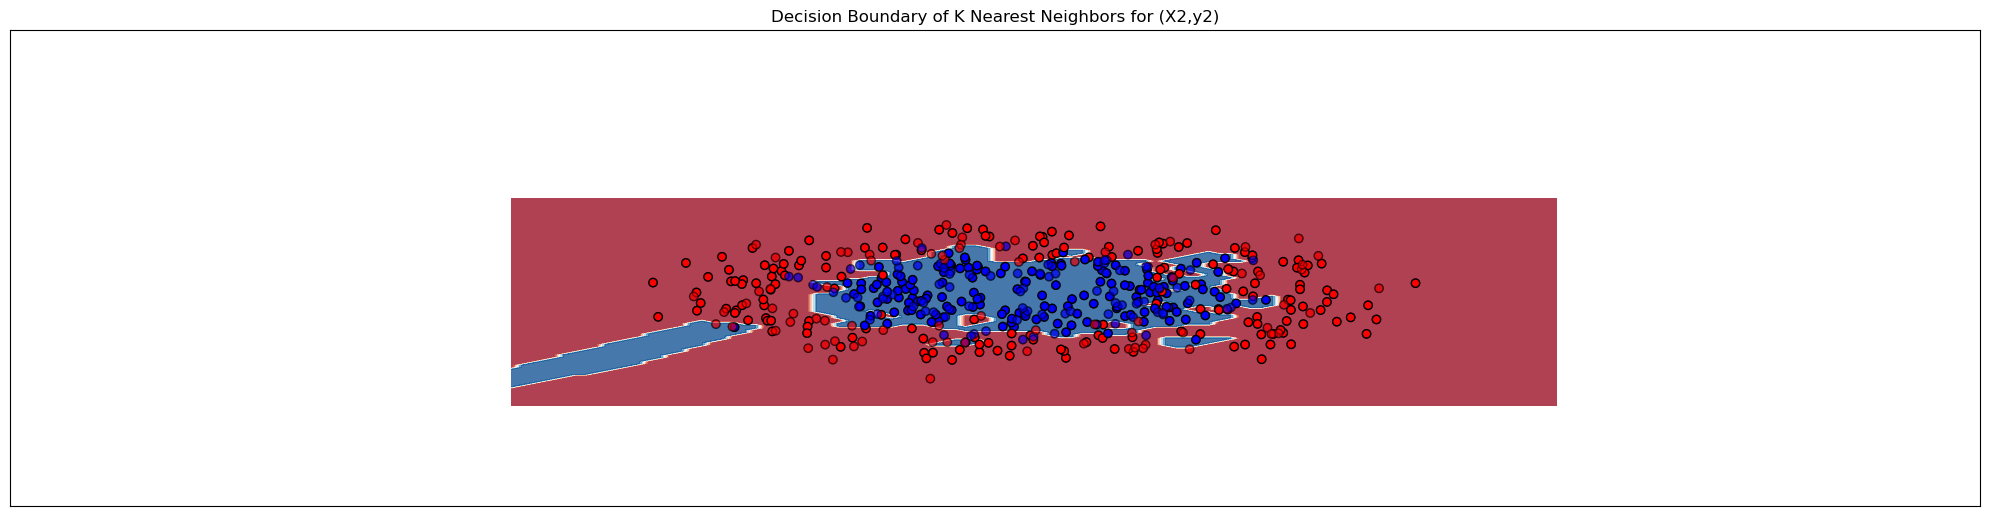

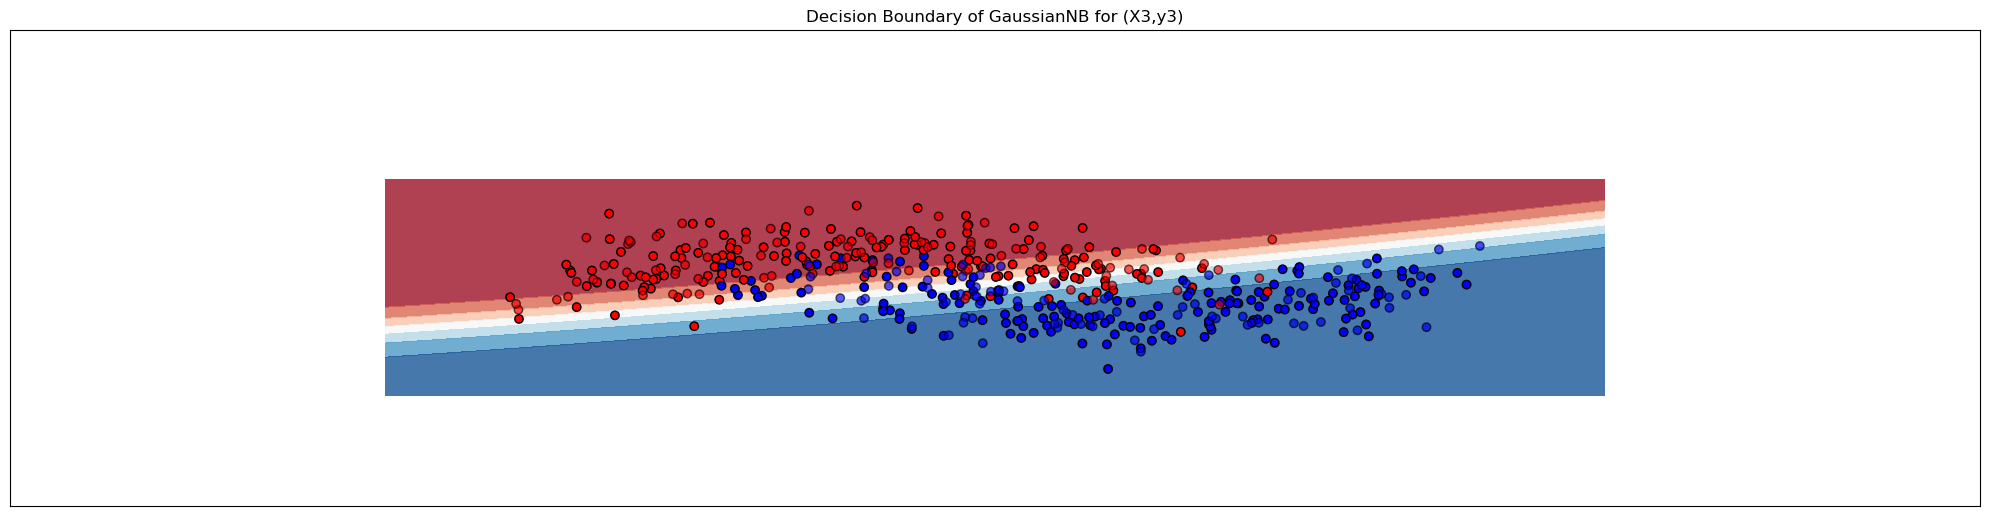

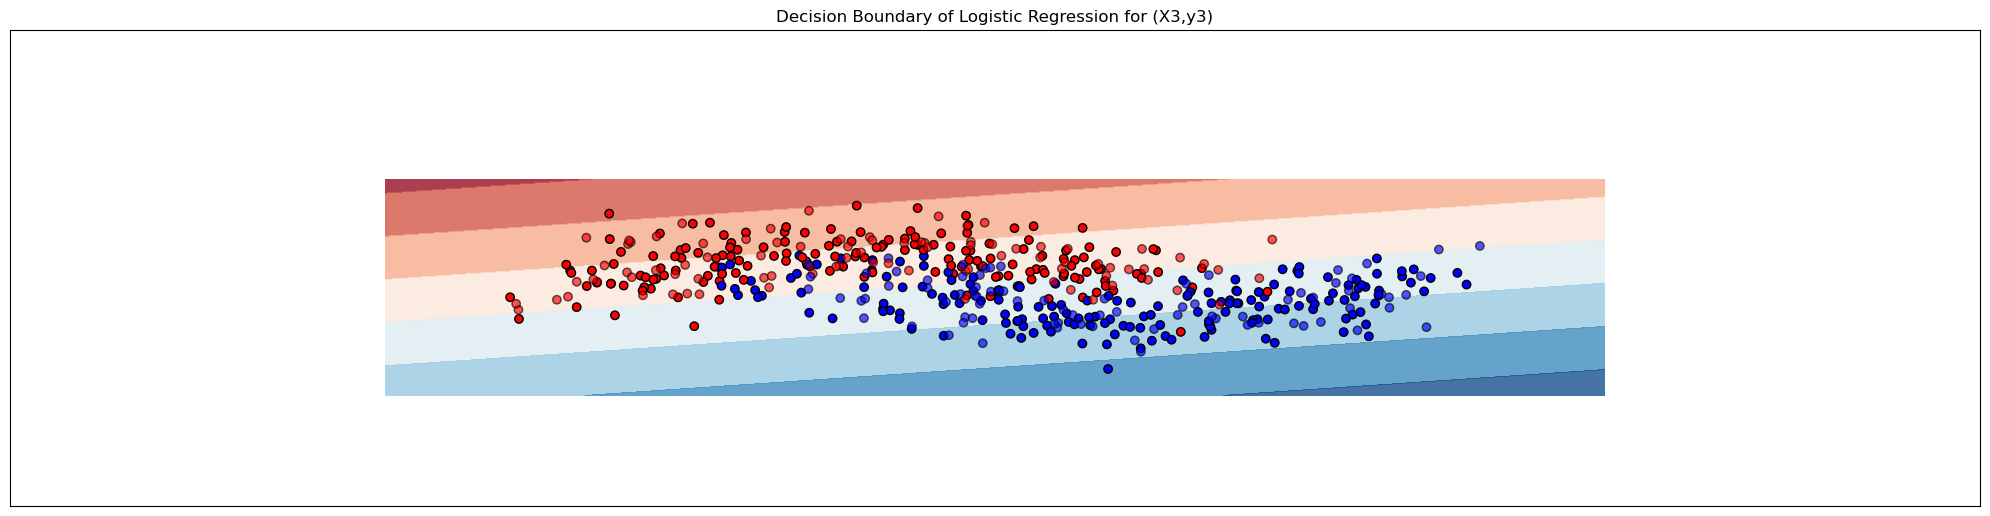

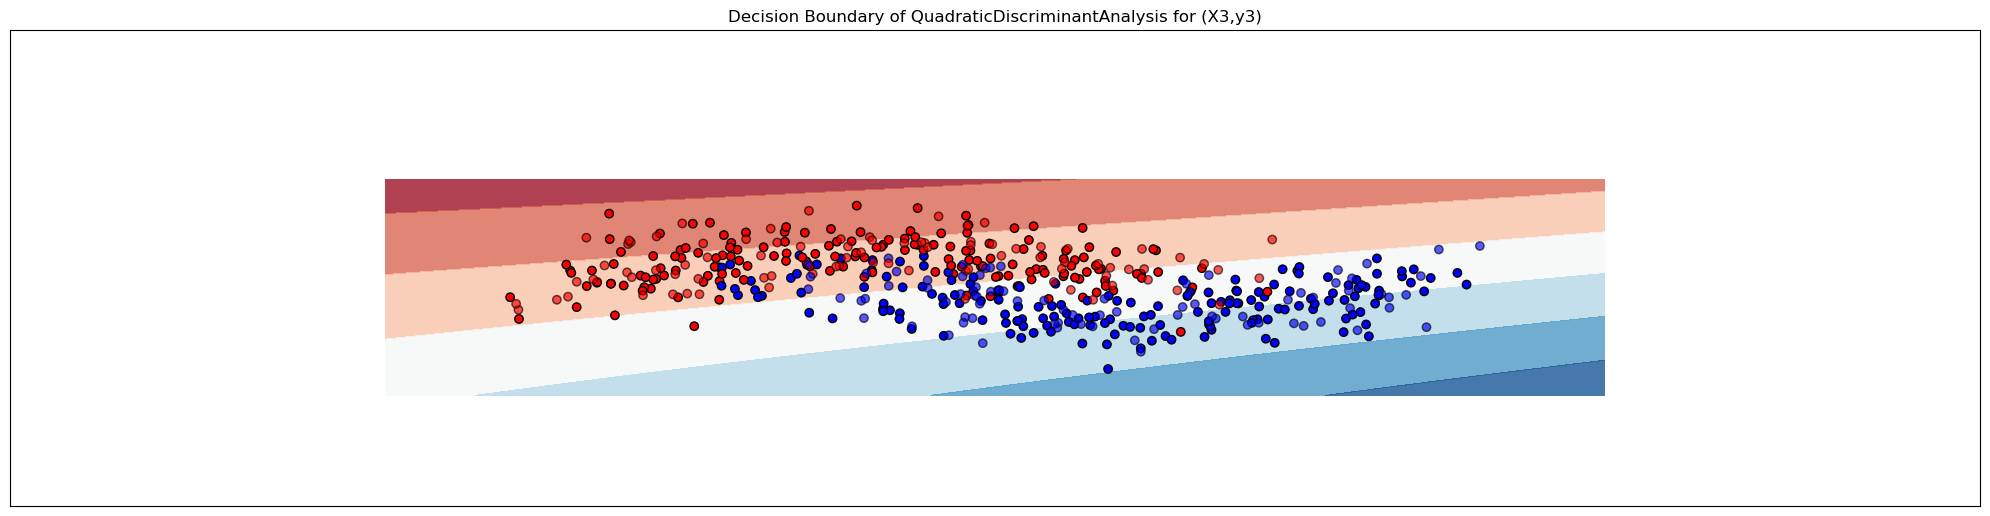

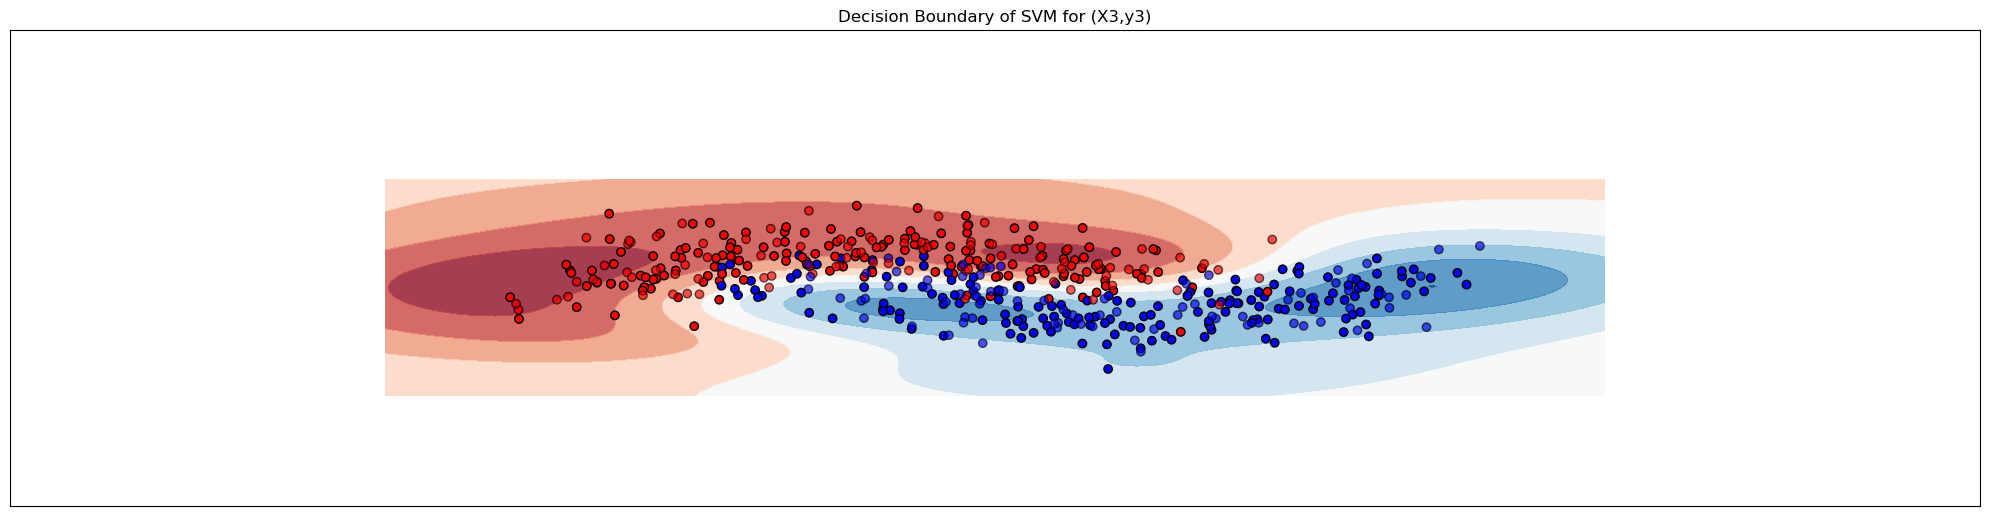

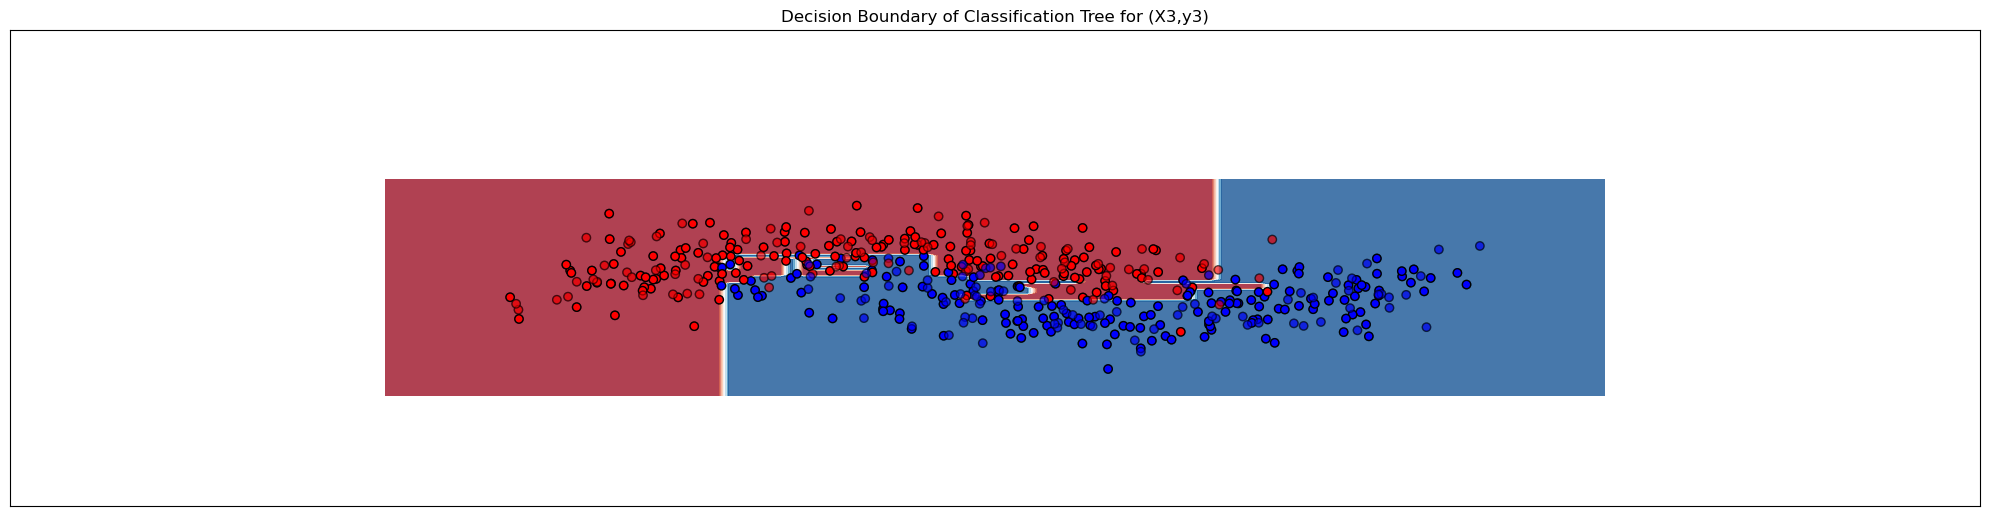

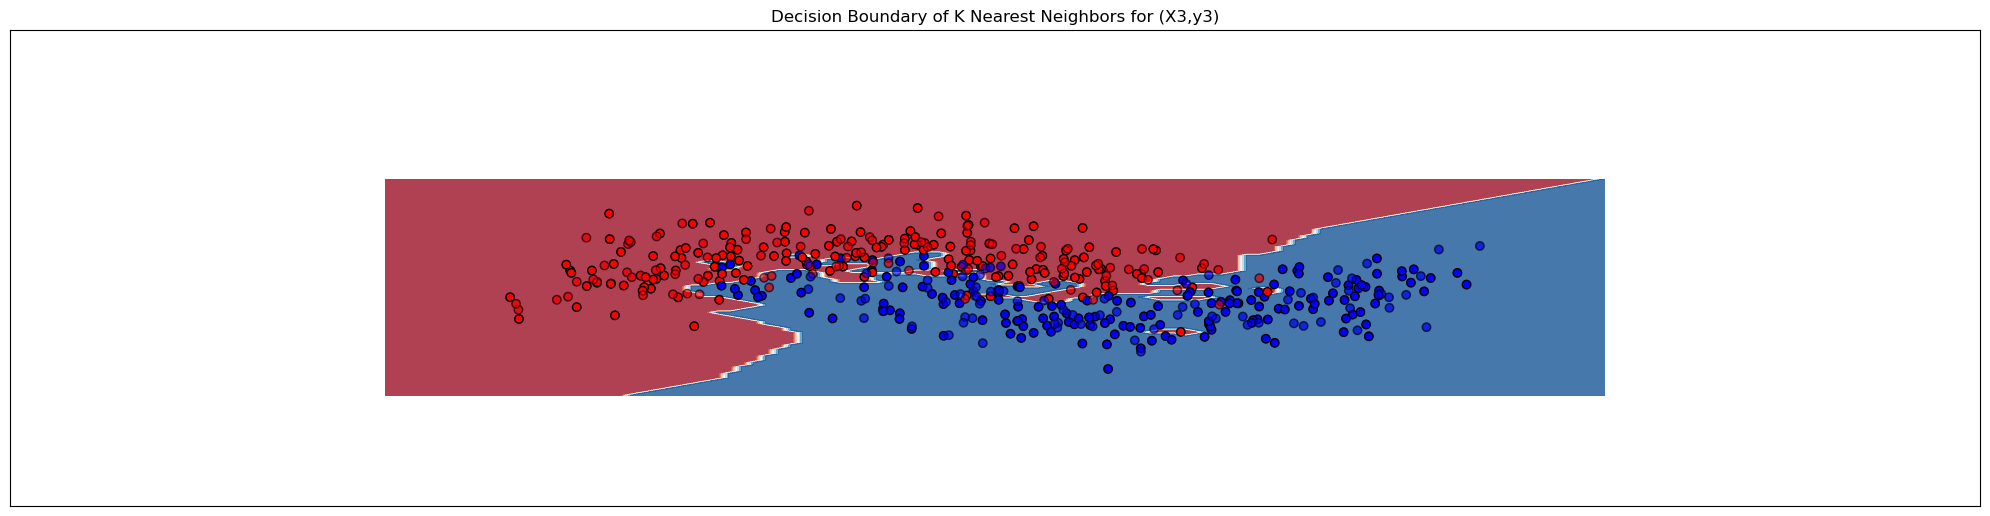

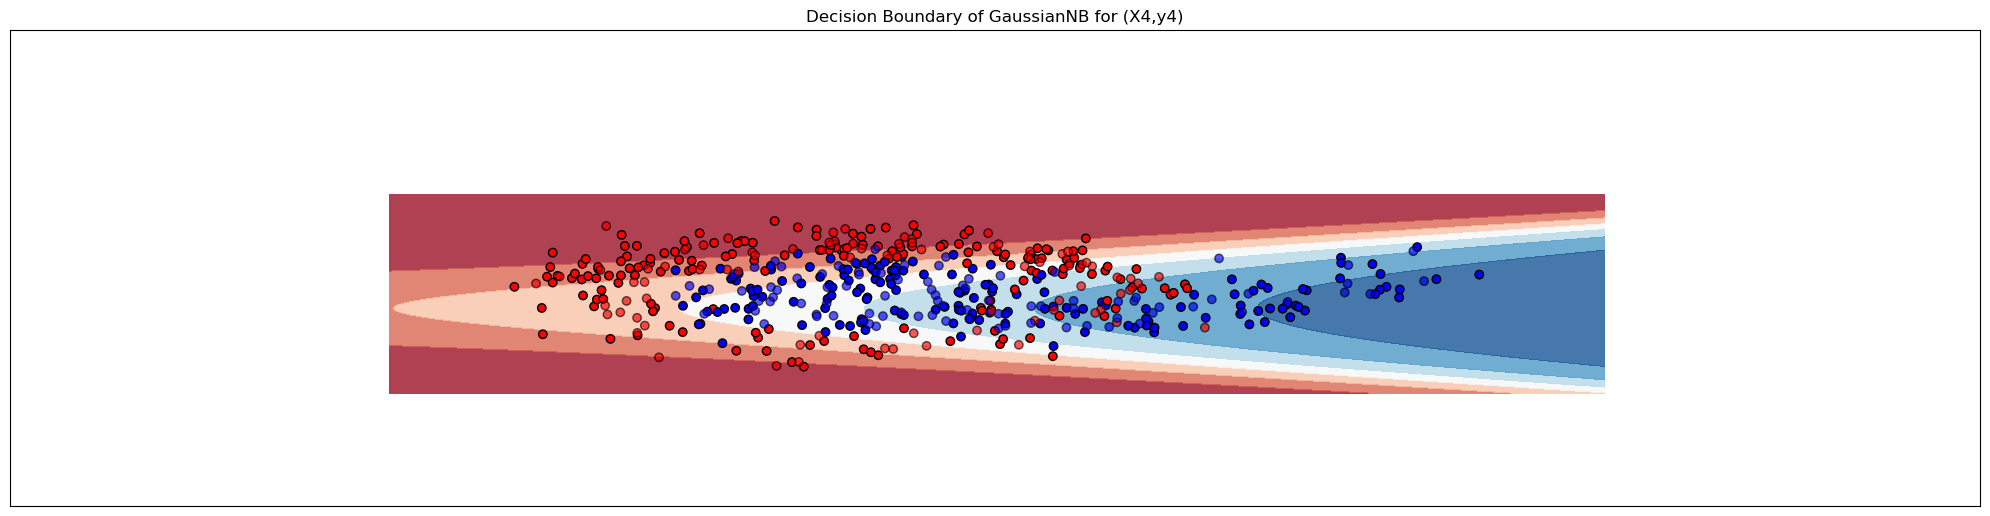

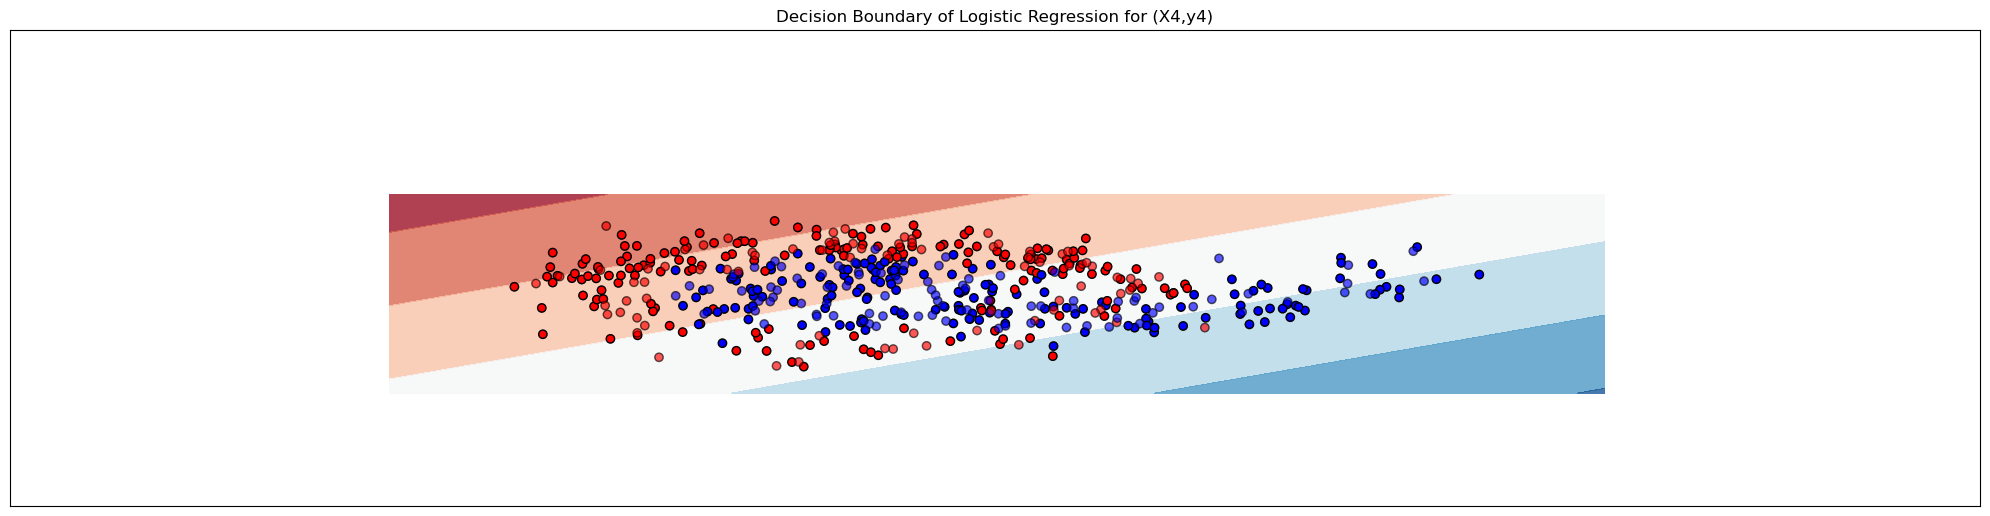

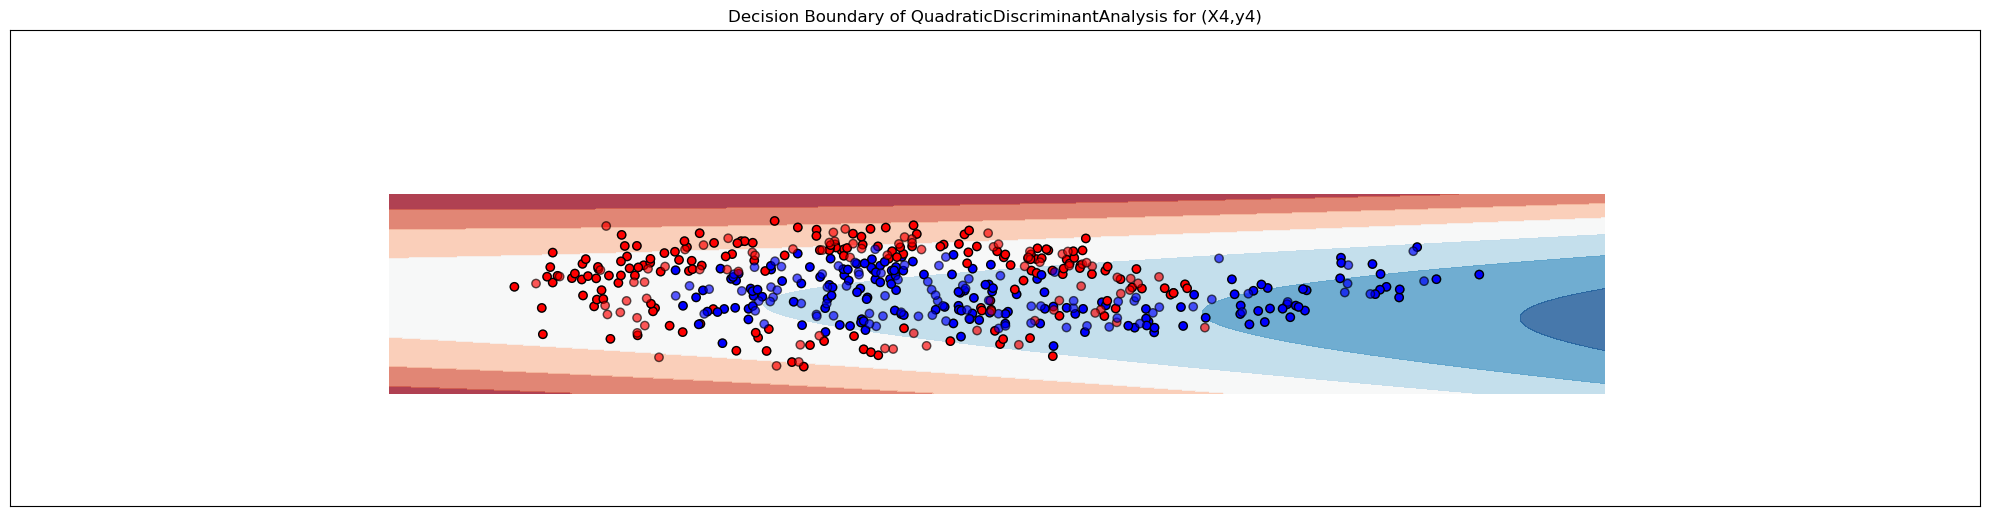

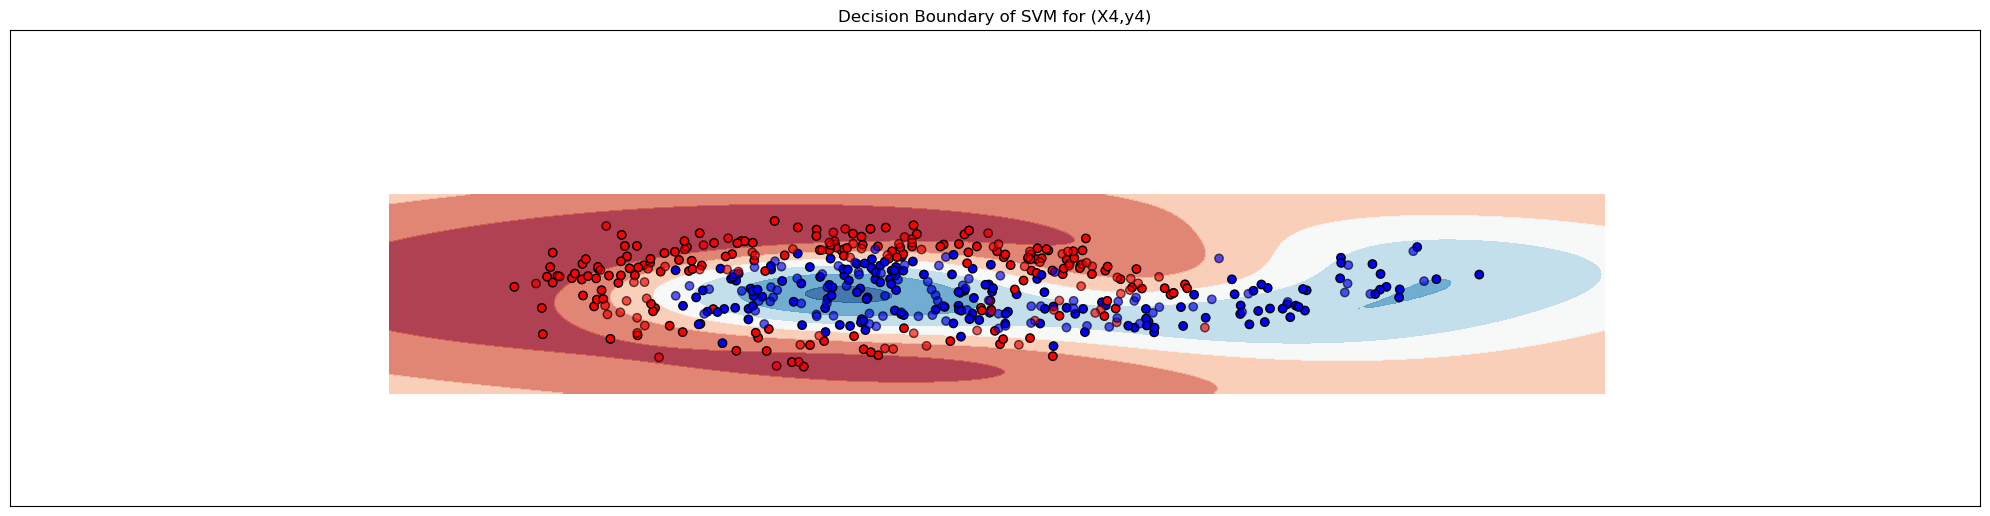

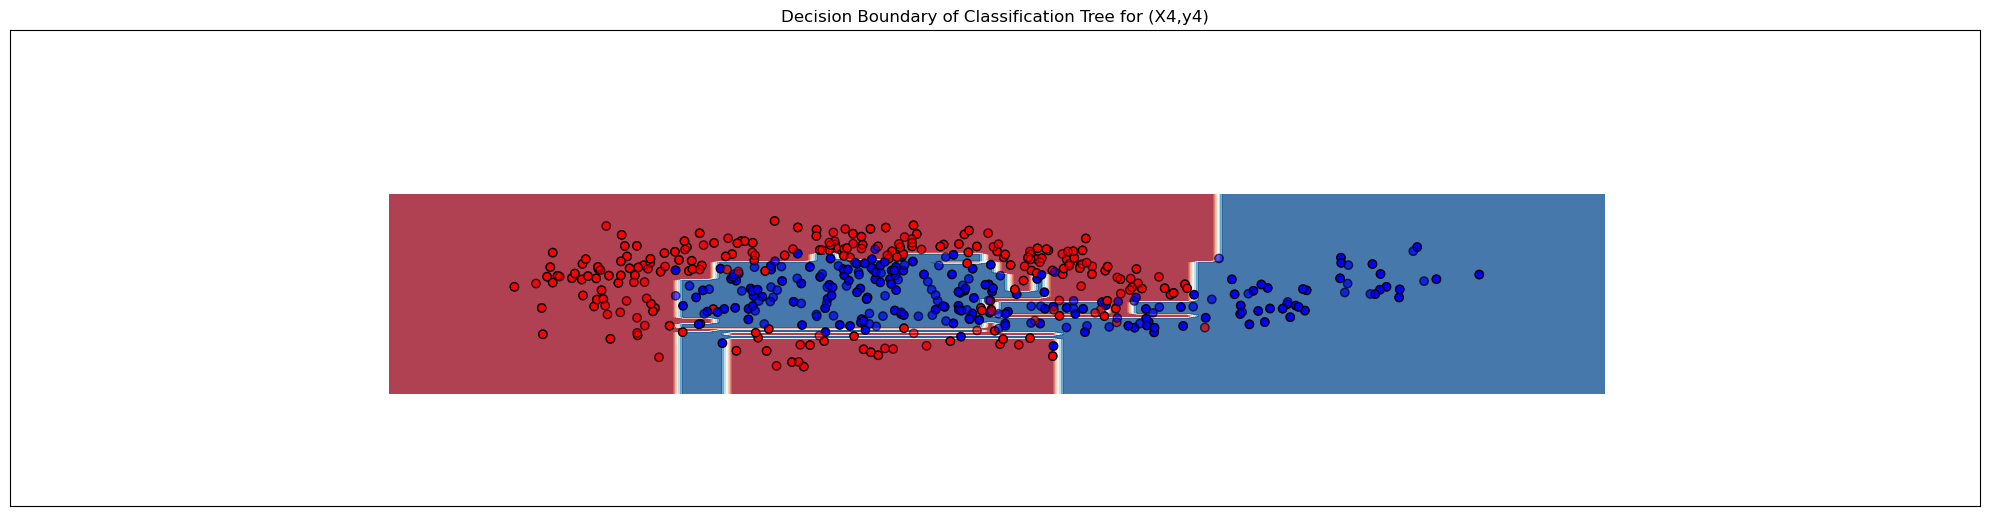

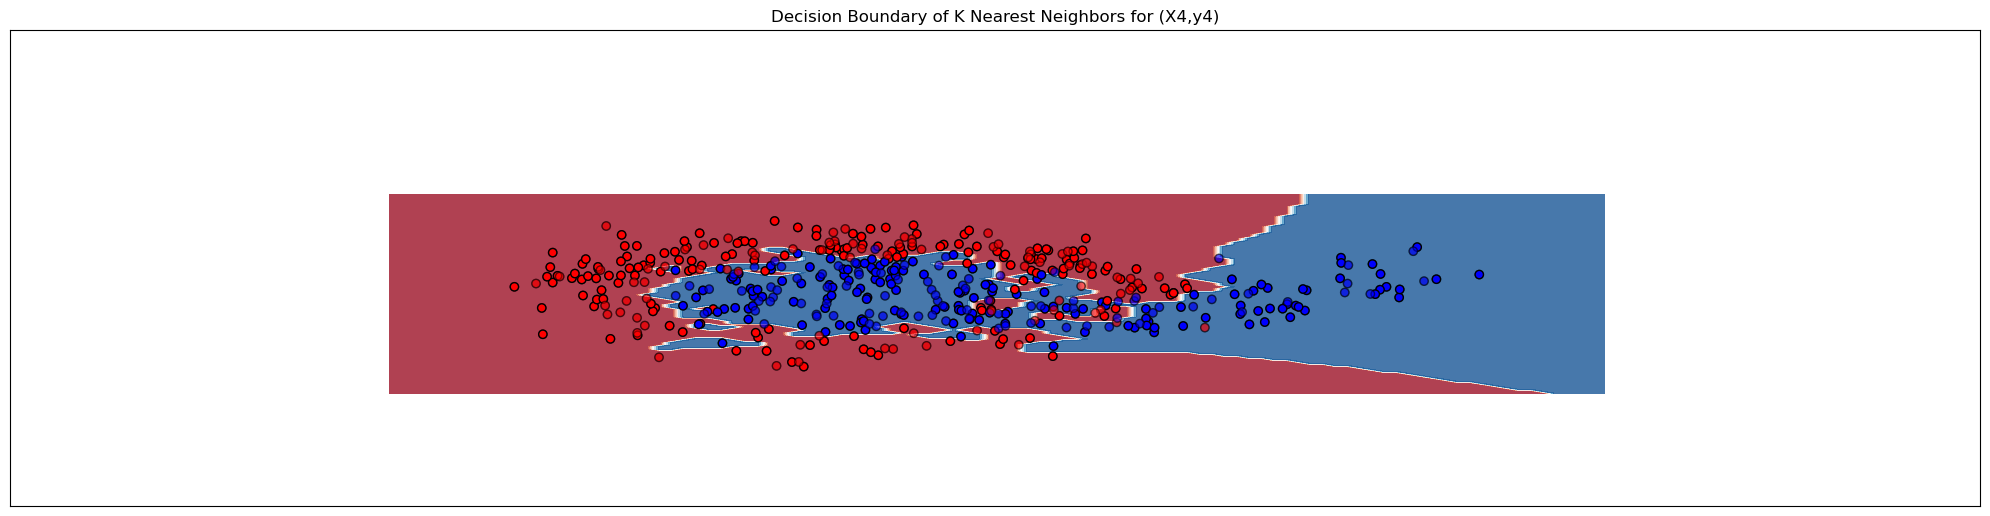

In [25]:
count = 1
for X,y in data_values:
    
    for clf_name, clf in classifiers:
        
        fig = plt.figure(figsize=(20, 20))
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(["#FF0000", "#0000FF"])
        ax = plt.subplot(4,  + 1, 1)
        
        X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33,random_state=42)
        
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
        ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
        ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
        ax.set_xticks(())
        ax.set_yticks(())
        
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        #score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)
        
        # Plot the training points
        ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(
        X_test[:, 0],X_test[:, 1],c=y_test,cmap=cm_bright,edgecolors="k",alpha=0.6,)
        X_min = np.min(X) - 2
        X_max = np.max(X) + 2
        y_min = np.min(y) - 4 
        y_max = np.max(y) + 4
        ax.set_xlim(X_min, X_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(f"Decision Boundary of {clf_name} for (X{count},y{count})")
    

        plt.tight_layout()
        plt.show()
    count+=1

## Conclusion from the decision boundary 
  **it is clear fromthe decision boundaries, how the KNN and Decision Tree algorithms overfits for all data sets**
  